## 노드/엣지의 삽입

In [1]:
import networkx as nx

G = nx.Graph()

In [2]:
G.add_node(1)
print(G.nodes())

[1]


In [3]:
G.add_node('P')
G.add_node('Hi')
print(G.nodes())

[1, 'P', 'Hi']


In [4]:
G.add_nodes_from([2, 3])
print(G.nodes())

[1, 'P', 'Hi', 2, 3]


In [5]:
nx.draw(G, with_labels=True, node_color='lightblue');

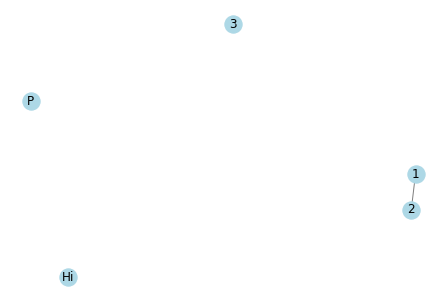

In [6]:
G.add_edge(1,2)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='grey');

In [7]:
print(G.edges())

[(1, 2)]


In [8]:
G.add_edges_from([(1,2), (1,3), (1,4), (1,5)])
print(G.edges())

[(1, 2), (1, 3), (1, 4), (1, 5)]


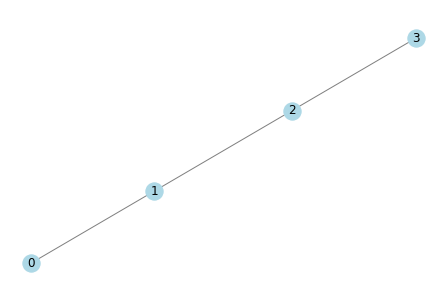

In [9]:
G = nx.path_graph(4)

G.add_edge(1,2)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='grey');

In [10]:
print(G.degree(0))
print(G.degree([0,1]))
print(G.degree())

1
[(0, 1), (1, 2)]
[(0, 1), (1, 2), (2, 2), (3, 1)]


## 노드/엣지의 삭제

In [11]:
G = nx.Graph()

G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,'P'), (1, 'Hi'), (4,5)])
print(G.edges())

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 'P'), (1, 'Hi'), (4, 5)]


In [12]:
G.remove_edge(1,3)
print(G.edges())

[(1, 2), (1, 4), (1, 5), (1, 'P'), (1, 'Hi'), (4, 5)]


In [13]:
G = nx.Graph()

G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,'P'), (1, 'Hi'), (4,5)])
print(G.edges())

G.remove_edges_from([(1,2), (1,3)])
print(G.edges())

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 'P'), (1, 'Hi'), (4, 5)]
[(1, 4), (1, 5), (1, 'P'), (1, 'Hi'), (4, 5)]


In [14]:
print(G.nodes())
G.remove_node(2)
print(G.nodes())

[1, 2, 3, 4, 5, 'P', 'Hi']
[1, 3, 4, 5, 'P', 'Hi']


In [15]:
G = nx.Graph()

G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,'P'), (1, 'Hi'), (4,5)])
print(G.nodes())
G.remove_nodes_from([3,4,5])
print(G.nodes())

[1, 2, 3, 4, 5, 'P', 'Hi']
[1, 2, 'P', 'Hi']


## 노드/엣지의 개수

In [16]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (4,5)])

print('No. nodes:', G.number_of_nodes())
print('No. edges:', G.number_of_edges())

No. nodes: 5
No. edges: 5


In [17]:
G.remove_edge(1,3)

print('No. nodes:', G.number_of_nodes())
print('No. edges:', G.number_of_edges())

No. nodes: 5
No. edges: 4


In [18]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (4,5)])

G.remove_node(3)

print('No. nodes:', G.number_of_nodes())
print('No. edges:', G.number_of_edges())

No. nodes: 4
No. edges: 4


## 특정확률 분포의 그래프 생성기

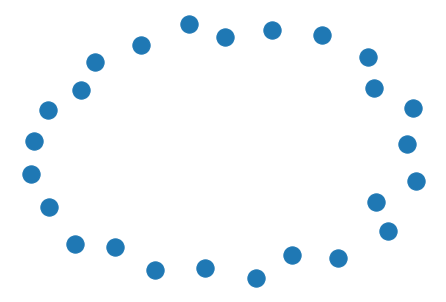

In [19]:
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(25, 0,2)
nx.draw(G)

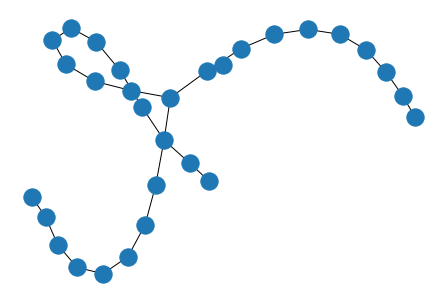

In [20]:
G = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw(G)

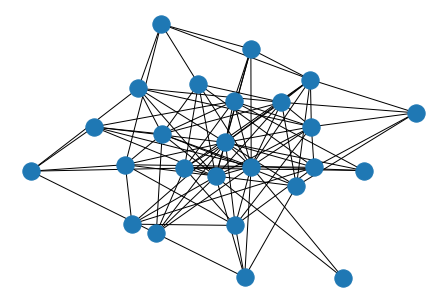

In [21]:
G = nx.barabasi_albert_graph(25, 5)
nx.draw(G)

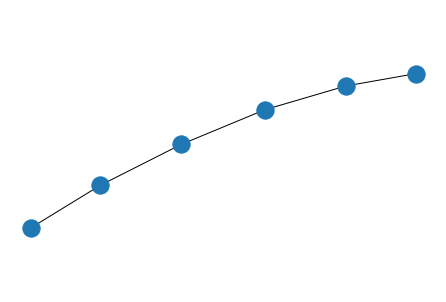

In [22]:
G = nx.random_lobster(25, 0.9, 0.9)
nx.draw(G)

In [23]:
from scipy.stats import bernoulli

for i in range(6):
    print(bernoulli.rvs(p=0.33))

0
0
1
1
0
1


In [24]:
import numpy as np

def erdosGraph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    listG = list(G.nodes())
    for i, node1 in enumerate(listG):
        for node2 in listG[i+1:]:
            if (bernoulli.rvs(p=p)):
                G.add_edge(node1, node2)
                
    return G

(array([ 1.,  1., 10., 11., 13., 15., 13.,  6.,  9.,  1.]),
 array([14. , 15.9, 17.8, 19.7, 21.6, 23.5, 25.4, 27.3, 29.2, 31.1, 33. ]),
 <a list of 1 Patch objects>)

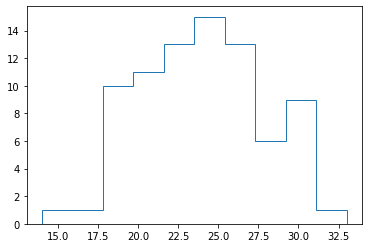

In [25]:
G1 = erdosGraph(80, 0.3)
plt.hist(list([d for n, d in G1.degree()]), histtype='step')

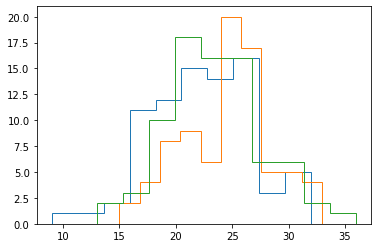

In [26]:
def pltGraph(G):
    plt.hist(list([d for n, d in G.degree()]), histtype='step')
    
G1 = erdosGraph(80, 0.3)
pltGraph(G1)
G2 = erdosGraph(80, 0.3)
pltGraph(G2)
G3 = erdosGraph(80, 0.3)
pltGraph(G3)

## 엑셀 파일로그래프 생성

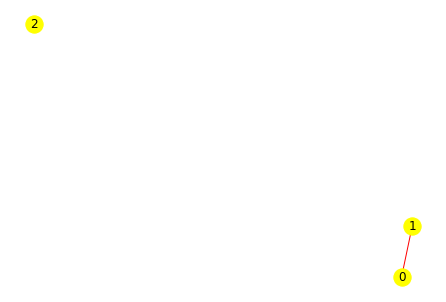

In [28]:
### 엑셀 파일 생성
K = np.loadtxt('test1.csv', delimiter=',')
G = nx.to_networkx_graph(K)
nx.draw(G, with_labels=True, node_color='yellow', edge_color='red')

### Netoworkx의 샘플 데이터 세트 1

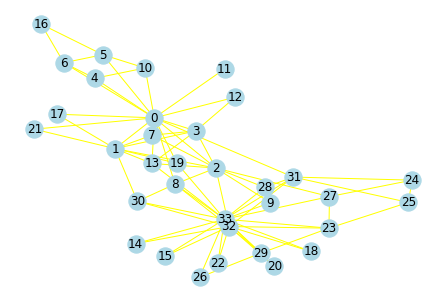

In [30]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='yellow')

In [31]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [32]:
G.degree(16)

2

In [35]:
print('노드의 개수: %d' % G.number_of_nodes())
print('엣지의 개수: %d' % G.number_of_edges())
print('평균 차수: %.1f' % np.mean([d for n, d in G.degree()]))

노드의 개수: 34
엣지의 개수: 78
평균 차수: 4.6


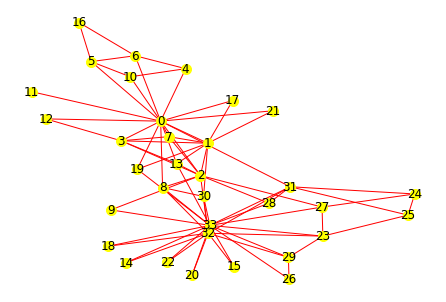

In [36]:
degree = [d for n, d in G.degree()]
nx.draw(G, with_labels=True, node_size=100, node_color='yellow', edge_color='red')

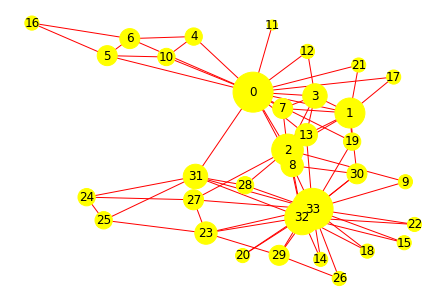

In [37]:
degree = [d for n, d in G.degree()]
nx.draw(G, with_labels=True, node_size=[n * 100 for n in degree], node_color='yellow', edge_color='red')